/home/bagjohn/Documents/PhD/mouseworld_python/mouseworld/mouse.py:506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.action_history['Distance'][self.action_history.index.max()] += distance
/home/bagjohn/Documents/PhD/mouseworld_python/mouseworld/mouse.py:422: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.action_history['Benefit'][self.action_history.index.max()] -= loss
/home/bagjohn/Documents/PhD/mouseworld_python/mouseworld/mouse.py:458: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

sim step : 1 in 2.564301


/home/bagjohn/Documents/PhD/mouseworld_python/mouseworld/mouse.py:338: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  action_history['Duration'][action_history.index.max()] += 1


sim step : 2 in 3.115165


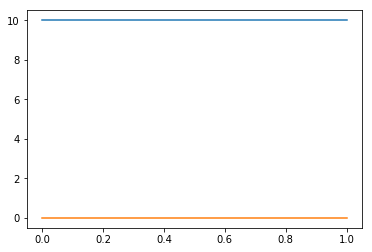

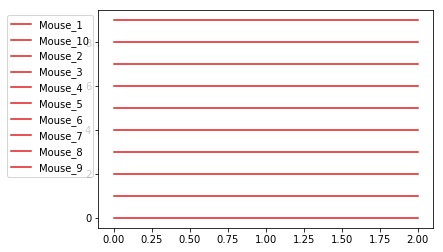

In [4]:
#%%writefile check_family_tree.py
from mouseworld import mouseworld
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
#import networkx as nx

simulation_number = 111
result_folder = 'results/simulation_%i'%simulation_number
os.makedirs(result_folder)

num_mice = [10, 0, 0]

# Build the model
model = mouseworld.Mouseworld(num_mice, 100, 50, 100, 100)


# Prepare environment by stepping food and predators and diffusing odors
# for i in range(100) :
#     model.food_schedule.step()
#     model.predator_schedule.step()
#     model.diffuse_odor_layers_parallel(model.odor_layers)
a=time.time()
for i in range(10) :
    model.food_schedule.step()
    model.predator_schedule.step()
    model.diffuse_odor_layers(model.odor_layers)
    
#Run for discrete number of timesteps
# b=time.time()
# print(b-a)
counter = 0
myrange = 2
for i in range(myrange) :
    c=time.time()
    counter += 1
    model.step()
    d=time.time()
    print('sim step : %i in %f'%(counter, d-c))

#Run until all mice perish
# while model.num_mice > 0 :
#     c=time.time()
#     counter += 1
#     model.step()
#     d=time.time()
#     print('sim step : %i in %f'%(counter, d-c))

# Gather model and data
model_data = model.model_datacollector.get_model_vars_dataframe()
model_data = model_data[['Alive_mice', 'Unborn_mice']]
model_data.to_csv('%s/num_mice.csv'%result_folder, sep='\t')
plt.plot(model_data['Alive_mice'])
plt.plot(model_data['Unborn_mice'])
plt.savefig('%s/num_mice.png'%result_folder, bbox_inches='tight')
plt.show()
#     plt.legend(bbox_to_anchor=(0, 1), loc='best')
# plt.savefig('results/check_family_tree.png', bbox_inches='tight')
# plt.show()

# Gather final model and agent data
model.final_datacollector.collect(model,model.all_mice_schedule)
final_model_data = model.final_datacollector.get_model_vars_dataframe()
final_agent_data = model.final_datacollector.get_agent_vars_dataframe()
genome_data = final_agent_data[['Genome']]
genome_data = genome_data.reset_index('Step', drop = True)
genome_data.to_csv('results/simulation_%i/genome_data.csv'%result_folder, sep='\t')
# print(type(genome_data))
tree_data = final_agent_data[['parent_ID', 'birth_date', 'age', 'generation']]
tree_data = tree_data.reset_index('AgentID').values


def rearrange_data (tree_data) :
    temp = [mouse for mouse in tree_data if mouse[1] is None]
    new_tree_data = []
    while len(temp) != 0 :
        offspring = [mouse for mouse in tree_data if mouse[1] == temp[0][0]]      
        new_tree_data.append(temp[0])
        temp = np.delete(temp, 0, 0)
        if len(offspring) != 0 :
            offspring.sort(key=lambda x: -x[2])
            for x in range(len(offspring)) :
                temp = np.insert(temp, 0, offspring[x], axis=0)
    return new_tree_data

cmap = mpl.cm.Set1
# print(cmap.N)
new_tree_data = rearrange_data(tree_data)
for i in range(len(new_tree_data)) :
    mouse = new_tree_data[i]
#     plt.plot((mouse[2], mouse[2] + mouse[3]), (i, i), 'k-')
    plt.plot((mouse[2], mouse[2] + mouse[3]), (i, i), color=cmap(mouse[4]%cmap.N), label=mouse[0])
    plt.legend(bbox_to_anchor=(0, 1), loc='best')
plt.savefig('results/simulation_%i/family_tree.png'%result_folder, bbox_inches='tight')
plt.show()


In [6]:
%%writefile check_action_history.py
from mouseworld import mouseworld
import time
import matplotlib.pyplot as plt
import numpy as np

num_mice = [0, 0, 200]

# Build the model
model = mouseworld.Mouseworld(num_mice, 100, 50, 100, 100)


# Prepare environment by stepping food and predators and diffusing odors
# for i in range(100) :
#     model.food_schedule.step()
#     model.predator_schedule.step()
#     model.diffuse_odor_layers_parallel(model.odor_layers)
a=time.time()
for i in range(10) :
    model.food_schedule.step()
    model.predator_schedule.step()
    model.diffuse_odor_layers(model.odor_layers)
#Run for discrete number of timesteps
b=time.time()
print(b-a)
counter = 0
myrange = 1000
# for i in range(myrange) :
#     c=time.time()
#     counter += 1
#     model.step()
#     d=time.time()
#     print('sim step : %i in %f'%(counter, d-c))
#t = np.arange(1, myrange*10 +1, 1)
#t = np.arange(1, (myrange-2)*10 +1, 1)
#Run until all mice perish
while model.num_mice > 0 :
    c=time.time()
    counter += 1
    model.step()
    d=time.time()
    print('sim step : %i in %f'%(counter, d-c))
# Gather final model and agent data
#model.mousebrain_datacollector.collect(model,model.schedule)
#mousebrain_data = model.mousebrain_datacollector.get_agent_vars_dataframe()
#mousebrain_data.to_csv('results/mousebrain_data.csv', sep='\t')
model.final_datacollector.collect(model,model.all_mice_schedule)
final_model_data = model.final_datacollector.get_model_vars_dataframe()
#final_model_data.to_csv('results/final_model_data.csv', sep='\t')
final_agent_data = model.final_datacollector.get_agent_vars_dataframe()

print(final_model_data)

for i in range(len(final_agent_data)) :
    print('Name : %s'%final_agent_data.index[i][1])
    print('Age : %i'%final_agent_data['age'][0].values[i])
    print('Generation : %i'%final_agent_data['generation'][0].values[i])
    print('Offspring : %i'%final_agent_data['num_offspring'][0].values[i])
    print('Energy : %f'%final_agent_data['energy'][0].values[i])
    print(final_agent_data['action_history'][0].values[i])
    #print(final_agent_data['possible_actions'][0].values[i])
    print(final_agent_data['primary_values'][0].values[i])
    print(final_agent_data['secondary_values'][0].values[i])
    print(final_agent_data['sensor_vector'][0].values[i])
    print(final_agent_data['sensor_position'][0].values[i])

Overwriting check_action_history.py


In [7]:
%%writefile check_mousebrain.py

from mouseworld import mouseworld
import time

import matplotlib.pyplot as plt
import numpy as np

# Build the model
model = mouseworld.Mouseworld([0, 0, 1], 0, 0, 100, 100)


# Prepare environment by stepping food and predators and diffusing odors
# for i in range(100) :
#     model.food_schedule.step()
#     model.predator_schedule.step()
#     model.diffuse_odor_layers_parallel(model.odor_layers)
# for i in range(10) :
#     model.food_schedule.step()
#     model.predator_schedule.step()
#     model.diffuse_odor_layers_parallel(model.odor_layers)
#Run for discrete number of timesteps
counter = 0
myrange = 20
for i in range(myrange) :
    counter += 1
    print('sim step : %i'%counter)
    model.step()
#t = np.arange(1, myrange*10 +1, 1)
#t = np.arange(1, (myrange-2)*10 +1, 1)
# Run until all mice perish
# while model.num_mice > 0 :
#     print('sim step : %i'%counter)
#     model.step()
    
# Gather final model and agent data
model.mousebrain_datacollector.collect(model,model.schedule)
mousebrain_data = model.mousebrain_datacollector.get_agent_vars_dataframe()
#mousebrain_data.to_csv('results/mousebrain_data.csv', sep='\t')

odor = mousebrain_data['odor'][0].values[0]
state = mousebrain_data['state'][0].values[0]
approach = mousebrain_data['approach'][0].values[0]
avoid = mousebrain_data['avoid'][0].values[0]
search = mousebrain_data['search'][0].values[0]
change = mousebrain_data['change'][0].values[0]
errors0 = mousebrain_data['errors0'][0].values[0]
errors1 = mousebrain_data['errors1'][0].values[0]
errors2 = mousebrain_data['errors2'][0].values[0]

# print (type(a))
# print(a)

odor1 = [row[0] for row in odor]
odor2 = [row[1] for row in odor]

approach1 = [row[0] for row in approach]
approach2 = [row[1] for row in approach]

avoid1 = [row[0] for row in avoid]
avoid2 = [row[1] for row in avoid]

search1 = [row[0] for row in search]
search2 = [row[1] for row in search]



state0 = [row[0] for row in state]
state1 = [row[1] for row in state]
state2 = [row[2] for row in state]

data = []

data.append(odor1)
data.append(odor2)
data.append(change)
data.append(search)
data.append(errors0)
data.append(errors1)
data.append(errors2)

data.append(avoid)
data.append(approach)
# plt.plot(t, odor, 'r--', t, state, 'r--', t, avoid, 'r--',
#          t, avoid, 'r--', t, search, 'r--', t, errors0, 'r--',
#          t, errors0, 'r--', t, errors1, 'r--', t, errors2, 'r--')

# plt.plot(odor1, color='blue', odor2, color = 'red', approach1, color = 'green', approach2, color = 'black')
# plt.show()
#x = np.linspace(0, 1, 10)
for i in [3]:
    plt.plot(data[i], label='$data{i}$'.format(i=i))
plt.legend(loc='best')
plt.show()

for i in [2,4]:
    plt.plot(data[i], label='$data{i}$'.format(i=i))
plt.legend(loc='best')
plt.show()

for i in [2,5]:
    plt.plot(data[i], label='$data{i}$'.format(i=i))
plt.legend(loc='best')
plt.show()

for i in [2,6]:
    plt.plot(data[i], label='$data{i}$'.format(i=i))
plt.legend(loc='best')
plt.show()

plt.plot(odor1, 'bs', change, 'r--')
plt.show()

plt.plot(errors0, 'bs', errors1, 'r--', errors2, 'g^')
plt.show()

# plt.plot(search1, 'bs', search2, 'r--')
# plt.show()

plt.plot(approach1, 'bs', approach2, 'r--')
plt.show()

plt.plot(state0, 'bs', state1, 'r--', state2, 'g^')
plt.show()

plt.plot(odor1, 'bs', odor2, 'r--')
plt.show()

Overwriting check_mousebrain.py
